<a href="https://colab.research.google.com/github/Polinysha/-/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def fibonacci_recursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci_recursive(n - 1) + fibonacci_recursive(n - 2)

# Вычисление первых 20 чисел Фибоначчи
fib_20 = [fibonacci_recursive(i) for i in range(20)]
print(fib_20)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [ ]:
def fibonacci_recursive(n):

    # Проверка ввода
    if not isinstance(n, int) or n <= 0:
        return "Positive integer expected"

    # Базовый случай: n = 1 → [0], n = 2 → [0, 1]
    if n == 1:
        return [0]
    elif n == 2:
        return [0, 1]

    # Рекурсивный случай: получаем предыдущую последовательность и добавляем новое число
    fib_seq = fibonacci_recursive(n - 1)
    fib_seq.append(fib_seq[-1] + fib_seq[-2])
    return fib_seq

In [ ]:
print("Тест 1: Последовательности для n от 1 до 10")
n = 10
for i in range(1, n + 1):
    print(f"n = {i}: {fibonacci_recursive(i)}")

Тест 1: Последовательности для n от 1 до 10
n = 1: [0]
n = 2: [0, 1]
n = 3: [0, 1, 1]
n = 4: [0, 1, 1, 2]
n = 5: [0, 1, 1, 2, 3]
n = 6: [0, 1, 1, 2, 3, 5]
n = 7: [0, 1, 1, 2, 3, 5, 8]
n = 8: [0, 1, 1, 2, 3, 5, 8, 13]
n = 9: [0, 1, 1, 2, 3, 5, 8, 13, 21]
n = 10: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [ ]:
print("Тест 2: Граничные случаи")
test_cases = [1, 2, 20]
for n in test_cases:
    print(f"n = {n}: {fibonacci_recursive(n)}")

Тест 2: Граничные случаи
n = 1: [0]
n = 2: [0, 1]
n = 20: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]


In [ ]:
print("Тест 3: Обработка некорректного ввода")
test_cases = [0, -5, 3.14, "abc"]
for n in test_cases:
    print(f"n = {n}: {fibonacci_recursive(n)}")

Тест 3: Обработка некорректного ввода
n = 0: Positive integer expected
n = -5: Positive integer expected
n = 3.14: Positive integer expected
n = abc: Positive integer expected


In [ ]:
# Доп проверка
test_cases = [5, 10, 30]
for n in test_cases:
    expected = [fibonacci_recursive(i)[-1] for i in range(1, n+1)]
    actual = fibonacci_recursive(n)
    print(f"n={n}: {actual == expected}")

n=5: True
n=10: True
n=30: True


In [ ]:
def fibonacci_iterative_dict(n):

    # Проверка корректности входных данных
    if not isinstance(n, int) or n <= 0:
        return "Ошибка: n должно быть положительным целым числом"

    # Инициализация первых двух чисел Фибоначчи
    fib_dict = {1: 0, 2: 1}

    # Специальный случай для n = 1
    if n == 1:
        return {1: 0}

    # Инициализация переменных для расчета последовательности
    prev_prev, prev = 0, 1  # F(1) и F(2)

    # Генерация чисел Фибоначчи с 3 по n
    for i in range(3, n + 1):
        current = prev_prev + prev
        fib_dict[i] = current
        prev_prev, prev = prev, current  # Обновляем значения для следующей итерации

    return fib_dict

In [ ]:
def fibonacci_iterative_list(n):

    # Проверка корректности входных данных
    if not isinstance(n, int) or n <= 0:
        return "Ошибка: n должно быть положительным целым числом"

    # Базовые случаи
    if n == 1:
        return {1: 0}
    if n == 2:
        return {1: 0, 2: 1}

    # Инициализация списка с первыми двумя числами
    fib_list = [0, 1]

    # Дополняем список до n элементов
    while len(fib_list) < n:
        next_num = fib_list[-2] + fib_list[-1]
        fib_list.append(next_num)

    # Преобразуем список в словарь с нумерацией от 1
    fib_dict = {i + 1: num for i, num in enumerate(fib_list)}

    return fib_dict

In [ ]:
def reverse_fib_dict(fib_dict, last_n=None):

    if not isinstance(fib_dict, dict):
        return "Ошибка: требуется словарь"

    # Если указано last_n, берем только последние элементы
    keys = sorted(fib_dict.keys())
    if last_n is not None and isinstance(last_n, int) and last_n > 0:
        keys = keys[-last_n:]

    reversed_dict = {}

    for key in keys:
        value = fib_dict[key]

        # Обработка возможных дубликатов значений
        if value in reversed_dict:
            if isinstance(reversed_dict[value], list):
                reversed_dict[value].append(key)
            else:
                reversed_dict[value] = [reversed_dict[value], key]
        else:
            reversed_dict[value] = key

    return reversed_dict

In [ ]:
# Тест 1: Последовательное построение для n от 1 до 5
print("Тест 1: Последовательное построение")
print("="*60)

n = 5
print("\nВариант 1 (через словарь):")
print("-"*50)
for i in range(1, n+1):
    print(f"Последовательность до {i}-го числа: {fibonacci_iterative_dict(i)}")

print("\nВариант 2 (через список):")
print("-"*50)
for i in range(1, n+1):
    print(f"Последовательность до {i}-го числа: {fibonacci_iterative_list(i)}")

Тест 1: Последовательное построение

Вариант 1 (через словарь):
--------------------------------------------------
Последовательность до 1-го числа: {1: 0}
Последовательность до 2-го числа: {1: 0, 2: 1}
Последовательность до 3-го числа: {1: 0, 2: 1, 3: 1}
Последовательность до 4-го числа: {1: 0, 2: 1, 3: 1, 4: 2}
Последовательность до 5-го числа: {1: 0, 2: 1, 3: 1, 4: 2, 5: 3}

Вариант 2 (через список):
--------------------------------------------------
Последовательность до 1-го числа: {1: 0}
Последовательность до 2-го числа: {1: 0, 2: 1}
Последовательность до 3-го числа: {1: 0, 2: 1, 3: 1}
Последовательность до 4-го числа: {1: 0, 2: 1, 3: 1, 4: 2}
Последовательность до 5-го числа: {1: 0, 2: 1, 3: 1, 4: 2, 5: 3}


In [ ]:
# Тест 2: Сравнение двух вариантов для n=20
print("Тест 2: Сравнение реализации для n=20")
print("="*60)

fib_dict_v1 = fibonacci_iterative_dict(20)
fib_dict_v2 = fibonacci_iterative_list(20)

print("\nРезультат варианта 1 (через словарь):")
print(fib_dict_v1)

print("\nРезультата варианта 2 (через список):")
print(fib_dict_v2)

print("\nСовпадают ли результаты?", fib_dict_v1 == fib_dict_v2)

Тест 2: Сравнение реализации для n=20

Результат варианта 1 (через словарь):
{1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 5, 7: 8, 8: 13, 9: 21, 10: 34, 11: 55, 12: 89, 13: 144, 14: 233, 15: 377, 16: 610, 17: 987, 18: 1597, 19: 2584, 20: 4181}

Результата варианта 2 (через список):
{1: 0, 2: 1, 3: 1, 4: 2, 5: 3, 6: 5, 7: 8, 8: 13, 9: 21, 10: 34, 11: 55, 12: 89, 13: 144, 14: 233, 15: 377, 16: 610, 17: 987, 18: 1597, 19: 2584, 20: 4181}

Совпадают ли результаты? True


In [ ]:
# Тест 3: Отладка алгоритма переворота словаря
print("Тест 3: Отладка переворота словаря")
print("="*60)

fib_dict = fibonacci_iterative_dict(5)
reversed_dict = {}
counter = 0

print("\nИсходный словарь Фибоначчи:")
print(fib_dict)

print("\nПроцесс переворота:")
for key in fib_dict:
    counter += 1
    value = fib_dict[key]
    print(f"\nИтерация #{counter}:")
    print(f"Обрабатываем пару: ключ={key}, значение={value}")

    if value in reversed_dict:
        existing = reversed_dict[value]
        print(f"Значение {value} уже существует в перевернутом словаре")

        if isinstance(existing, list):
            print(f"Добавляем ключ {key} к существующему списку")
            existing.append(key)
        else:
            print(f"Создаем новый список из старого значения {existing} и нового {key}")
            reversed_dict[value] = [existing, key]
    else:
        print(f"Значение {value} встречается впервые, добавляем ключ {key}")
        reversed_dict[value] = key

    print(f"Текущее состояние перевернутого словаря: {reversed_dict}")

print("\nФинальный результат переворота:")
print(reversed_dict)

Тест 3: Отладка переворота словаря

Исходный словарь Фибоначчи:
{1: 0, 2: 1, 3: 1, 4: 2, 5: 3}

Процесс переворота:

Итерация #1:
Обрабатываем пару: ключ=1, значение=0
Значение 0 встречается впервые, добавляем ключ 1
Текущее состояние перевернутого словаря: {0: 1}

Итерация #2:
Обрабатываем пару: ключ=2, значение=1
Значение 1 встречается впервые, добавляем ключ 2
Текущее состояние перевернутого словаря: {0: 1, 1: 2}

Итерация #3:
Обрабатываем пару: ключ=3, значение=1
Значение 1 уже существует в перевернутом словаре
Создаем новый список из старого значения 2 и нового 3
Текущее состояние перевернутого словаря: {0: 1, 1: [2, 3]}

Итерация #4:
Обрабатываем пару: ключ=4, значение=2
Значение 2 встречается впервые, добавляем ключ 4
Текущее состояние перевернутого словаря: {0: 1, 1: [2, 3], 2: 4}

Итерация #5:
Обрабатываем пару: ключ=5, значение=3
Значение 3 встречается впервые, добавляем ключ 5
Текущее состояние перевернутого словаря: {0: 1, 1: [2, 3], 2: 4, 3: 5}

Финальный результат перевор

In [ ]:
# Вычисляем с какого ключа начинать
start_key = max(len(fib_dict) - view_num + 1, 1)
selected_keys = [k for k in fib_dict if k >= start_key]

print(f"Всего элементов: {len(fib_dict)}")
print(f"Выбранные ключи (последние {view_num}): {selected_keys}")
print(f"Соответствующие значения: { {k: fib_dict[k] for k in selected_keys} }")

Всего элементов: 20
Выбранные ключи (последние 15): [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Соответствующие значения: {6: 5, 7: 8, 8: 13, 9: 21, 10: 34, 11: 55, 12: 89, 13: 144, 14: 233, 15: 377, 16: 610, 17: 987, 18: 1597, 19: 2584, 20: 4181}


In [ ]:
print("Тест 4: Переворот последних 15 элементов")
print("="*60)

reversed_last_15 = reverse_fib_dict(fib_dict, 15)
print("Перевернутый словарь (последние 15 элементов):")
print(reversed_last_15)

Тест 4: Переворот последних 15 элементов
Перевернутый словарь (последние 15 элементов):
{5: 6, 8: 7, 13: 8, 21: 9, 34: 10, 55: 11, 89: 12, 144: 13, 233: 14, 377: 15, 610: 16, 987: 17, 1597: 18, 2584: 19, 4181: 20}


### Задание 3 ★☆☆  
Сумма четных чисел в последовательности с условиями

Напишите функцию conditional_even_sum(sequence, threshold), которая принимает список целых чисел и возвращает сумму всех четных чисел в этом списке, которые больше заданного порогового значения threshold.  

`sequence = [1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 20]`

`threshold = 5`

In [ ]:
def validate_input(sequence, threshold):

    if not isinstance(sequence, list):
        raise TypeError("sequence must be a list")
    if not sequence:
        raise ValueError("sequence cannot be empty")
    if not all(isinstance(x, int) for x in sequence):
        raise TypeError("all elements in sequence must be integers")
    if not isinstance(threshold, int):
        raise TypeError("threshold must be an integer")

    return True

def conditional_even_sum(sequence, threshold):
    try:
        validate_input(sequence, threshold)
    except (TypeError, ValueError) as e:
        return f"Ошибка: {e}"

    return sum(x for x in sequence if x > threshold and x % 2 == 0)

In [ ]:
# Тест 1: Проверка корректных входных данных
test_sequences = [
    ([1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 20], 5),
    ([10, 20, 30, 40], 15),
    ([-4, -2, 0, 2, 4], -3),
    ([100, 101, 102, 103], 99),
    ([2, 4, 6, 8], 10),
]

print("=== Тест 1: Проверка корректных данных ===")
for seq, th in test_sequences:
    result = conditional_even_sum(seq, th)
    print(f"Список: {seq}, порог: {th} → Результат: {result}")

=== Тест 1: Проверка корректных данных ===
Список: [1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 20], порог: 5 → Результат: 46
Список: [10, 20, 30, 40], порог: 15 → Результат: 90
Список: [-4, -2, 0, 2, 4], порог: -3 → Результат: 4
Список: [100, 101, 102, 103], порог: 99 → Результат: 202
Список: [2, 4, 6, 8], порог: 10 → Результат: 0


In [ ]:
# Тест 2: Проверка ошибок ввода
test_errors = [
    ([1, 2, 3.5], 5),
    ([], 5),
    ("1, 2, 3", 5),
    ([1, 2, 3], "5"),
    ([1, 2, 3], None),
]

print("Тест 2: Проверка ошибок ввода")
for seq, th in test_errors:
    result = conditional_even_sum(seq, th)
    print(f"Вход: {seq}, {th} → {result}")

Тест 2: Проверка ошибок ввода
Вход: [1, 2, 3.5], 5 → Ошибка: all elements in sequence must be integers
Вход: [], 5 → Ошибка: sequence cannot be empty
Вход: 1, 2, 3, 5 → Ошибка: sequence must be a list
Вход: [1, 2, 3], 5 → Ошибка: threshold must be an integer
Вход: [1, 2, 3], None → Ошибка: threshold must be an integer


In [ ]:
test_cases = [
    # Корректные данные
    {
        "input": ([1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 20], 5),
        "expected": 46,
        "description": "Нормальный случай: четные числа > 5"
    },
    {
        "input": ([10, 20, 30, 40], 15),
        "expected": 90,
        "description": "Все числа больше порога"
    },
    {
        "input": ([-4, -2, 0, 2, 4], -3),
        "expected": 6,
        "description": "Отрицательный порог"
    },
    {
        "input": ([2, 4, 6, 8], 10),
        "expected": 0,
        "description": "Нет чисел больше порога"
    },
    {
        "input": ([100, 101, 102, 103], 99),
        "expected": 202,
        "description": "Большие числа"
    },

    # Ошибочные данные
    {
        "input": ([1, 2, 3.5], 5),
        "expected": "Ошибка: all elements in sequence must be integers",
        "description": "Нецелочисленные элементы"
    },
    {
        "input": ([], 5),
        "expected": "Ошибка: sequence cannot be empty",
        "description": "Пустой список"
    },
    {
        "input": ("1,2,3", 5),
        "expected": "Ошибка: sequence must be a list",
        "description": "Sequence не список"
    },
    {
        "input": ([1, 2, 3], "5"),
        "expected": "Ошибка: threshold must be an integer",
        "description": "Threshold не целое число"
    },
    {
        "input": ([1, 2, 3], None),
        "expected": "Ошибка: threshold must be an integer",
        "description": "Threshold None"
    }
]

In [ ]:
print("Начало тестирования")
for i, test in enumerate(test_cases, 1):
    sequence, threshold = test["input"]
    result = conditional_even_sum(sequence, threshold)
    status = "Пройден" if result == test["expected"] else "Не пройден"
    print(f"\nТест #{i}: {test['description']}")
    print(f"Входные данные: {sequence}, {threshold}")
    print(f"Ожидаемый результат: {test['expected']}")
    print(f"Фактический результат: {result}")
    print(f"Статус: {status}")

print("Тестирование завершено")

Начало тестирования

Тест #1: Нормальный случай: четные числа > 5
Входные данные: [1, 2, 3, 4, 5, 6, 8, 9, 12, 15, 20], 5
Ожидаемый результат: 46
Фактический результат: 46
Статус: Пройден

Тест #2: Все числа больше порога
Входные данные: [10, 20, 30, 40], 15
Ожидаемый результат: 90
Фактический результат: 90
Статус: Пройден

Тест #3: Отрицательный порог
Входные данные: [-4, -2, 0, 2, 4], -3
Ожидаемый результат: 6
Фактический результат: 4
Статус: Не пройден

Тест #4: Нет чисел больше порога
Входные данные: [2, 4, 6, 8], 10
Ожидаемый результат: 0
Фактический результат: 0
Статус: Пройден

Тест #5: Большие числа
Входные данные: [100, 101, 102, 103], 99
Ожидаемый результат: 202
Фактический результат: 202
Статус: Пройден

Тест #6: Нецелочисленные элементы
Входные данные: [1, 2, 3.5], 5
Ожидаемый результат: Ошибка: all elements in sequence must be integers
Фактический результат: Ошибка: all elements in sequence must be integers
Статус: Пройден

Тест #7: Пустой список
Входные данные: [], 5
Ожид

In [ ]:
def check_sequence(sequence):

    is_invalid = (
        not isinstance(sequence, list)  # Не список?
        or not sequence  # Пустой список?
        or any(not isinstance(x, int) for x in sequence)  # Есть нецелые элементы?
    )
    return is_invalid


def sum_of_unique_products(sequence=None, print_pairs=False):

    if sequence is None:
        sequence = []

    if check_sequence(sequence):
        error_msg = "Ожидается непустой список целых чисел!"
        return (error_msg, []) if print_pairs else error_msg

    unique_numbers = sorted(sequence)
    pairs = []
    total_sum = 0

    for i in range(len(unique_numbers)):
        for j in range(i + 1, len(unique_numbers)):
            first_num = unique_numbers[i]
            second_num = unique_numbers[j]
            pairs.append((first_num, second_num))
            total_sum += first_num * second_num

    return (total_sum, pairs) if print_pairs else total_sum

In [ ]:
# Тест 1: Обычный случай (уникальные числа)
def test_unique_numbers():
    result = sum_of_unique_products([1, 2, 3])
    assert result == 11, f"Ожидалось 11, получено {result}"  # 1*2 + 1*3 + 2*3 = 2 + 3 + 6 = 11
    print("Тест 1 пройден (уникальные числа)")

# Тест 2: Повторяющиеся числа (должны учитываться пары с одинаковыми числами)
def test_duplicate_numbers():
    result = sum_of_unique_products([2, 2, 3])
    assert result == 16, f"Ожидалось 16, получено {result}"  # 2*2 + 2*3 + 2*3 = 4 + 6 + 6 = 16
    print("Тест 2 пройден (повторяющиеся числа)")

# Тест 3: Пустой список (должна быть ошибка)
def test_empty_list():
    result = sum_of_unique_products([])
    assert result == "Ожидается непустой список целых чисел!", f"Ожидалась ошибка, получено {result}"
    print("Тест 3 пройден (пустой список)")

# Тест 4: Некорректные данные (не числа)
def test_invalid_data():
    result = sum_of_unique_products([1, "2", 3])
    assert result == "Ожидается непустой список целых чисел!", f"Ожидалась ошибка, получено {result}"
    print("Тест 4 пройден (некорректные данные)")

# Тест 5: Вывод пар (print_pairs=True)
def test_with_pairs():
    sum_result, pairs = sum_of_unique_products([1, 2, 3], print_pairs=True)
    assert sum_result == 11, f"Ожидалась сумма 11, получено {sum_result}"
    assert pairs == [(1, 2), (1, 3), (2, 3)], f"Ожидались пары [(1,2), (1,3), (2,3)], получено {pairs}"
    print("Тест 5 пройден (вывод пар)")

# Запуск всех тестов
if __name__ == "__main__":
    test_unique_numbers()
    test_duplicate_numbers()
    test_empty_list()
    test_invalid_data()
    test_with_pairs()
    print("Все тесты успешно пройдены!")

Тест 1 пройден (уникальные числа)
Тест 2 пройден (повторяющиеся числа)
Тест 3 пройден (пустой список)
Тест 4 пройден (некорректные данные)
Тест 5 пройден (вывод пар)
Все тесты успешно пройдены!


In [ ]:
sequence = [1, 2, 3]
print( f'''> Ввод: {sequence} \n> Вывод: {sum_of_unique_products(sequence)}.'''
)
print("\nДемо с дубликатами:")
print(f"> Ввод: [2, 2, 3] \n> Вывод: {sum_of_unique_products([2, 2, 3])}.")

> Ввод: [1, 2, 3] 
> Вывод: 11.

Демо с дубликатами:
> Ввод: [2, 2, 3] 
> Вывод: 16.


In [ ]:
def is_palindrome(s: str) -> bool:

    if not isinstance(s, str):
        raise TypeError("Ожидается строковый аргумент")

    left = 0
    right = len(s) - 1

    while left < right:
        # Пропускаем не-буквенные символы слева
        while left < right and not s[left].isalpha():
            left += 1
        # Пропускаем не-буквенные символы справа
        while left < right and not s[right].isalpha():
            right -= 1

        # Сравниваем символы (без учета регистра)
        if s[left].lower() != s[right].lower():
            return False

        left += 1
        right -= 1

    return True

In [ ]:
test_cases = [
    ("A man, a plan, a canal, Panama!", True),
    ("Я — арка края", True),
    ("Муха! О, муха! Велика аки лев! Ах, ум! О ах, ум!", True),
    ("Не палиндром", False),
    ("", True),  # пустая строка
    ("a", True),  # один символ
    ("12321", False),  # цифры не учитываются
    ("Was it a car or a cat I saw?", True),
    ("No 'x' in Nixon", True),
    ("Шалаш", True),
    ("Python", False),
    (".,!?", True)  # нет букв
]

print('>>> Тестирование функции is_palindrome():')
for i, (case_, expected) in enumerate(test_cases, 1):
    result = is_palindrome(case_)
    status = "Верно" if result == expected else "Ошибка"
    print(f'''-----------------------------------------------------------------
    Тест {i} ({status})
    > Ввод: {case_}
    > Ожидаемый результат: {expected}
    > Фактический результат: {result}'''
    )

# Отдельный тест для некорректного ввода
print('''-----------------------------------------------------------------
    Тест 13 (проверка обработки ошибок)
    > Ввод: 12345 (не строка)
    > Ожидаемый результат: TypeError''')
try:
    is_palindrome(12345)
    print("    > Фактический результат: Ошибка не вызвана")
except TypeError:
    print("    > Фактический результат: TypeError")
except Exception as e:
    print(f"    > Фактический результат: {type(e).__name__}")

>>> Тестирование функции is_palindrome():
-----------------------------------------------------------------
    Тест 1 (Верно)
    > Ввод: A man, a plan, a canal, Panama!
    > Ожидаемый результат: True
    > Фактический результат: True
-----------------------------------------------------------------
    Тест 2 (Верно)
    > Ввод: Я — арка края
    > Ожидаемый результат: True
    > Фактический результат: True
-----------------------------------------------------------------
    Тест 3 (Верно)
    > Ввод: Муха! О, муха! Велика аки лев! Ах, ум! О ах, ум!
    > Ожидаемый результат: True
    > Фактический результат: True
-----------------------------------------------------------------
    Тест 4 (Верно)
    > Ввод: Не палиндром
    > Ожидаемый результат: False
    > Фактический результат: False
-----------------------------------------------------------------
    Тест 5 (Верно)
    > Ввод: 
    > Ожидаемый результат: True
    > Фактический результат: True
--------------------------------

In [ ]:
print("ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ is_palindrome()\n" + "="*50)

examples = [
    ("A man, a plan, a canal: Panama", True),
    ("Я иду с мечем судия", True),
    ("12321", False),
    ("", True),
    ("Hello, world!", False),
    ("А роза упала на лапу Азора", True)
]

for text, expected in examples:
    result = is_palindrome(text)
    print(f'Ввод: "{text[:20]}{"..." if len(text)>20 else ""}"')
    print(f'Результат: {result} ({ "Верно" if result == expected else "Ошибка" })')
    print("-"*50)

ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ is_palindrome()
Ввод: "A man, a plan, a can..."
Результат: True (Верно)
--------------------------------------------------
Ввод: "Я иду с мечем судия"
Результат: True (Верно)
--------------------------------------------------
Ввод: "12321"
Результат: True (Ошибка)
--------------------------------------------------
Ввод: ""
Результат: True (Верно)
--------------------------------------------------
Ввод: "Hello, world!"
Результат: False (Верно)
--------------------------------------------------
Ввод: "А роза упала на лапу..."
Результат: True (Верно)
--------------------------------------------------


In [ ]:
def seconds_to_hours(n):

    if not isinstance(n, int) or n < 0:
        return "Ошибка: введите целое неотрицательное число"

    hours = n // 3600
    remaining = n % 3600
    minutes = remaining // 60
    seconds = remaining % 60

    return f"Часы: {hours}. Минуты: {minutes}. Секунды: {seconds}."

# Демонстрация работы
demo_cases = [
    0,
    59,
    60,
    3599,
    3600,
    3661,
    45296,
    -100,
    "text",
    123.45
]

print("ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ:")
print("=" * 40)
for n in demo_cases:
    print(f"> Ввод: {n} сек.")
    print(f"> Вывод: {seconds_to_hours(n)}")
    print("-" * 40)

ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ:
> Ввод: 0 сек.
> Вывод: Часы: 0. Минуты: 0. Секунды: 0.
----------------------------------------
> Ввод: 59 сек.
> Вывод: Часы: 0. Минуты: 0. Секунды: 59.
----------------------------------------
> Ввод: 60 сек.
> Вывод: Часы: 0. Минуты: 1. Секунды: 0.
----------------------------------------
> Ввод: 3599 сек.
> Вывод: Часы: 0. Минуты: 59. Секунды: 59.
----------------------------------------
> Ввод: 3600 сек.
> Вывод: Часы: 1. Минуты: 0. Секунды: 0.
----------------------------------------
> Ввод: 3661 сек.
> Вывод: Часы: 1. Минуты: 1. Секунды: 1.
----------------------------------------
> Ввод: 45296 сек.
> Вывод: Часы: 12. Минуты: 34. Секунды: 56.
----------------------------------------
> Ввод: -100 сек.
> Вывод: Ошибка: введите целое неотрицательное число
----------------------------------------
> Ввод: text сек.
> Вывод: Ошибка: введите целое неотрицательное число
----------------------------------------
> Ввод: 123.45 сек.
> Вывод: Ошибка: введите це

In [ ]:
def dict_counter(sequence):

    if not isinstance(sequence, list):
        raise TypeError("Ожидается список целых чисел")

    result = {}
    for num in sequence:
        if not isinstance(num, int):
            continue  # пропускаем нецелые элементы
        if num in result:
            result[num] += 1
        else:
            result[num] = 1
    return result


In [ ]:
# Демонстрация работы функции
test_cases = [
    [1, 2, 2, 3, 3, 3],
    [5, -5, 5, 0, 0],
    [],
    [1, 'a', 2.5, 3],  # содержит нецелые элементы
    list(range(5))
]

print("ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ dict_counter:")
print("=" * 50)
for i, test in enumerate(test_cases, 1):
    try:
        print(f"Тест {i}:")
        print(f"Ввод: {test}")
        print(f"Результат: {dict_counter(test)}")
        print("-" * 50)
    except TypeError as e:
        print(f"Ошибка: {e}")
        print("-" * 50)

ДЕМОНСТРАЦИЯ РАБОТЫ ФУНКЦИИ dict_counter:
Тест 1:
Ввод: [1, 2, 2, 3, 3, 3]
Результат: {1: 1, 2: 2, 3: 3}
--------------------------------------------------
Тест 2:
Ввод: [5, -5, 5, 0, 0]
Результат: {5: 2, -5: 1, 0: 2}
--------------------------------------------------
Тест 3:
Ввод: []
Результат: {}
--------------------------------------------------
Тест 4:
Ввод: [1, 'a', 2.5, 3]
Результат: {1: 1, 3: 1}
--------------------------------------------------
Тест 5:
Ввод: [0, 1, 2, 3, 4]
Результат: {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}
--------------------------------------------------


In [ ]:
def filter_numbers(sequence):

    if not isinstance(sequence, list):
        raise TypeError("Аргумент должен быть списком")

    # Инвертируем все числа
    inverted_numbers = map(lambda x: -x, sequence)

    # Фильтруем только положительные
    positive_numbers = filter(lambda x: x > 0, inverted_numbers)

    return list(positive_numbers)

In [ ]:
demo_cases = [
    [1, 2, 3],
    [-1, -2, -3],
    [-5, 0, 5, -10, 10],
    [],
    [0, 0, 0],
    None,
    "not a list",
    ['a', 'b'],
]

print('>>> Демонстрация работы filter_numbers():')
for i, case in enumerate(demo_cases):
    print('-' * 65)
    print(f'Пример {i+1}.')
    print(f'> Ввод: {case}')
    try:
        result = filter_numbers(case) if case is not None else filter_numbers(case)
        print(f'> Вывод: {result}')
    except Exception as e:
        print(f'> Ошибка: {type(e).__name__}: {e}')

>>> Демонстрация работы filter_numbers():
-----------------------------------------------------------------
Пример 1.
> Ввод: [1, 2, 3]
> Вывод: []
-----------------------------------------------------------------
Пример 2.
> Ввод: [-1, -2, -3]
> Вывод: [1, 2, 3]
-----------------------------------------------------------------
Пример 3.
> Ввод: [-5, 0, 5, -10, 10]
> Вывод: [5, 10]
-----------------------------------------------------------------
Пример 4.
> Ввод: []
> Вывод: []
-----------------------------------------------------------------
Пример 5.
> Ввод: [0, 0, 0]
> Вывод: []
-----------------------------------------------------------------
Пример 6.
> Ввод: None
> Ошибка: TypeError: 'NoneType' object is not iterable
-----------------------------------------------------------------
Пример 7.
> Ввод: not a list
> Ошибка: TypeError: '>' not supported between instances of 'str' and 'int'
-----------------------------------------------------------------
Пример 8.
> Ввод: ['a', 'b']


In [ ]:
def check_sequence(sequence):

    if not isinstance(sequence, list) or not sequence:
        return True

    for segment in sequence:
        if (not isinstance(segment, tuple) or len(segment) != 2):
            return True
        a, b = segment
        if not all(isinstance(x, (int, float)) for x in (a, b)):
            return True

    return False

def sorted_segments(sequence=None):

    if sequence is None:
        return None

    if check_sequence(sequence):
        return None

    # Фильтруем некорректные отрезки (где b < a)
    valid_segments = [seg for seg in sequence if seg[1] >= seg[0]]

    if not valid_segments:
        return None

    # Сортируем сначала по длине, затем по начальной точке
    valid_segments.sort(key=lambda x: (x[1] - x[0], x[0]))
    return valid_segments

In [ ]:
demo_cases = [
    [(1, 12), (5, 7), (8, 8)],
    [(1, 12.0), (5.0, 7), (8, 8), (2.4, 7.6)],
    [(2, 4), (1.5, 3.5), (2, 4.5), (1, 3), (1, 7), (0, 6), (1.0, 3), (3, 5)]
]
print('>>> Примеры ввода:')
for i, case in enumerate(demo_cases):
    print(f'''
    Пример {i+1}.
    > Ввод: {case}
    > Вывод: {sorted_segments(case)}'''
    )

>>> Примеры ввода:

    Пример 1.
    > Ввод: [(1, 12), (5, 7), (8, 8)]
    > Вывод: [(8, 8), (5, 7), (1, 12)]

    Пример 2.
    > Ввод: [(1, 12.0), (5.0, 7), (8, 8), (2.4, 7.6)]
    > Вывод: [(8, 8), (5.0, 7), (2.4, 7.6), (1, 12.0)]

    Пример 3.
    > Ввод: [(2, 4), (1.5, 3.5), (2, 4.5), (1, 3), (1, 7), (0, 6), (1.0, 3), (3, 5)]
    > Вывод: [(1, 3), (1.0, 3), (1.5, 3.5), (2, 4), (3, 5), (2, 4.5), (0, 6), (1, 7)]


In [ ]:
# Тесты
test_cases = [
    None, [None], [], [[]],
    [([], 0), (1.5, 3.5), (2, 4.5), (1, 3), (1, 7), (0, 6), (1.0, 3), (3, 5)],
    [(1, 2, 4), (2, 3)], [(4, 2), (3.5, 3)]
]
print('>>> Примеры некорректного ввода')
for i, case in enumerate(test_cases):
    print(f'''
    Пример {i+1}.
    > Ввод: {case}
    > Вывод: {sorted_segments(case)}'''
    )

>>> Примеры некорректного ввода

    Пример 1.
    > Ввод: None
    > Вывод: None

    Пример 2.
    > Ввод: [None]
    > Вывод: None

    Пример 3.
    > Ввод: []
    > Вывод: None

    Пример 4.
    > Ввод: [[]]
    > Вывод: None

    Пример 5.
    > Ввод: [([], 0), (1.5, 3.5), (2, 4.5), (1, 3), (1, 7), (0, 6), (1.0, 3), (3, 5)]
    > Вывод: None

    Пример 6.
    > Ввод: [(1, 2, 4), (2, 3)]
    > Вывод: None

    Пример 7.
    > Ввод: [(4, 2), (3.5, 3)]
    > Вывод: None


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import requests
from zipfile import ZipFile
from io import BytesIO, TextIOWrapper

In [ ]:
'''
https://archive.ics.uci.edu/static/public/320/student+performance.zip
student.zip
student-mat.csv
'''
url = 'https://archive.ics.uci.edu/static/public/320/student+performance.zip'
response = requests.get(url)
outer_zip = ZipFile(BytesIO(response.content))
inner_zip_bytes = outer_zip.read('student.zip')
inner_zip = ZipFile(BytesIO(inner_zip_bytes))
with inner_zip.open('student-mat.csv', 'r') as csvfile:
    csv_text = TextIOWrapper(csvfile, encoding='ASCII')
    data = pd.read_csv(csv_text, sep=';')

In [ ]:
shape = data.shape

In [ ]:
print(' '.join(map(str, shape)))

395 33


In [ ]:
data.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
list(data.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
more_than_mean = data[data['G1'] > data['G1'].mean()].shape[0]
print(data['G1'].mean())

10.90886075949367


In [ ]:
print(more_than_mean)

202


In [ ]:
absences_at_100 = data.sort_values(by='G3', ascending=False)['absences'].iloc[100-1]

In [ ]:
print(absences_at_100)

6


In [ ]:
print(data['sex'].unique())

['F' 'M']


In [ ]:
series_object = data.groupby('sex')['sex'].count()
series_object = series_object / series_object.sum()
print(type(series_object))
print(series_object)
print(series_object.index)

<class 'pandas.core.series.Series'>
sex
F    0.526582
M    0.473418
Name: sex, dtype: float64
Index(['F', 'M'], dtype='object', name='sex')


In [ ]:
print("{:.3f} {:.3f}".format(series_object['M'], series_object['F']))

0.473 0.527


In [ ]:
null_count = data.isna().sum().sum()

In [ ]:
print(null_count)

0


In [ ]:
# 1. Проверка уникальных значений
unique_values = data['Mjob'].unique()
print("Исходные уникальные значения:\n", unique_values)
print("\nОтсортированные уникальные значения:\n", sorted(unique_values))

# 2. Создание словаря для замены
value_to_code = {value: idx for idx, value in enumerate(sorted(unique_values))}
print("\nСловарь для замены значений на коды:")
for value, code in value_to_code.items():
    print(f"{value}: {code}")

# 3. Замена значений в колонке
data['Mjob_encoded'] = data['Mjob'].map(value_to_code)

# 4. Проверка распределения значений после замены
print("\nРаспределение значений после кодирования:")
print(data['Mjob_encoded'].value_counts().sort_index())

# 5. Дополнительная проверка соответствия кодов исходным значениям
print("\nСоответствие кодов исходным значениям:")
check_mapping = data[['Mjob', 'Mjob_encoded']].drop_duplicates().sort_values('Mjob_encoded')
print(check_mapping)

Исходные уникальные значения:
 [0 1 2 3 4]

Отсортированные уникальные значения:
 [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

Словарь для замены значений на коды:
0: 0
1: 1
2: 2
3: 3
4: 4

Распределение значений после кодирования:
Mjob_encoded
0     59
1     34
2    141
3    103
4     58
Name: count, dtype: int64

Соответствие кодов исходным значениям:
    Mjob  Mjob_encoded
0      0             0
3      1             1
4      2             2
5      3             3
10     4             4


In [ ]:
data_mjob_unique = sorted(data['Mjob'].unique())

values_decode = {v: str(i) for (i, v) in enumerate(data_mjob_unique)}

data['Mjob_ini'] = data['Mjob']
data['Mjob'] = data['Mjob'].replace(values_decode)

In [ ]:
data[['Mjob', 'Mjob_ini']].sample(10)

,Mjob,Mjob_ini
284,2,2
186,3,3
121,3,3
86,0,0
32,4,4
254,2,2
21,1,1
268,1,1
200,1,1
175,4,4


In [ ]:
data.groupby('Mjob')['Mjob'].count()

,Mjob
Mjob,
0,59
1,34
2,141
3,103
4,58


In [ ]:
print(data['Mjob'].value_counts().idxmax())

2


In [ ]:
df_grouped = data.groupby('sex').agg(
    g3_mean = ('G3', 'mean'),
    g3_median = ('G3', 'median'),
    g3_max = ('G3', 'max')
)

In [ ]:
print(df_grouped)
print(type(df_grouped))

       g3_mean  g3_median  g3_max
sex                              
F     9.966346       10.0      19
M    10.914439       11.0      20
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print("{:.3f}".format(df_grouped.sum().sum()))

80.881


In [ ]:
mean_score_high_level = data[(data['G1'] > data['G1'].median()) & (data['G2'] > data['G2'].median()) & (data['G3'] > data['G3'].median())]['absences'].mean()

In [ ]:
print("{:.4f}".format(mean_score_high_level))

4.4926


In [ ]:
import matplotlib.pyplot as plt

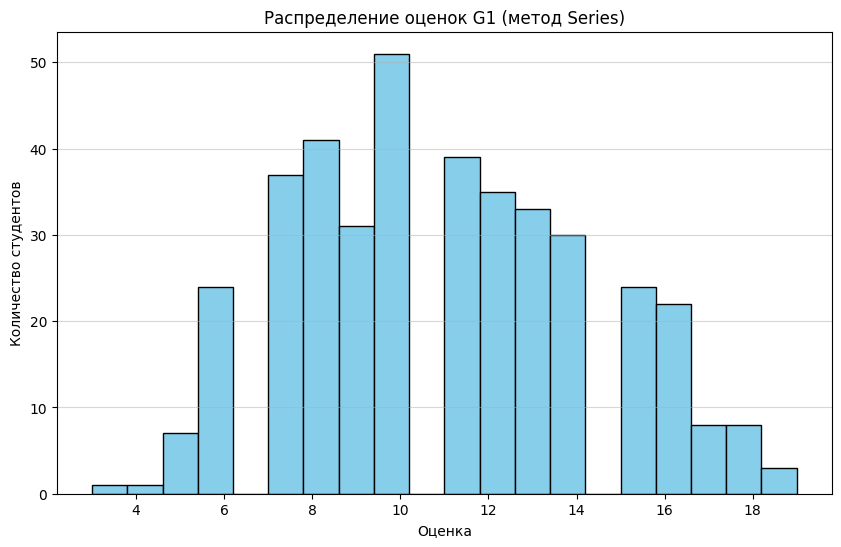

<Figure size 1000x600 with 0 Axes>

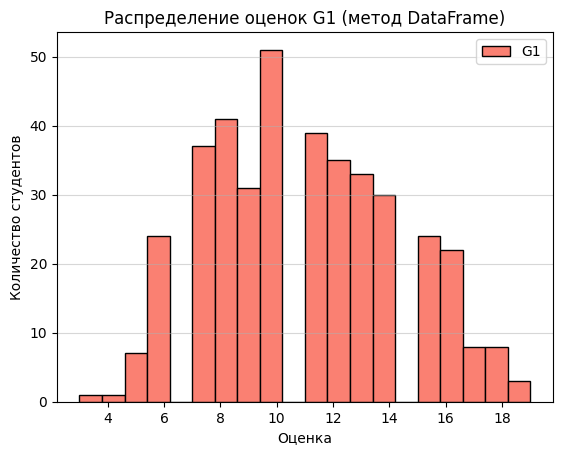

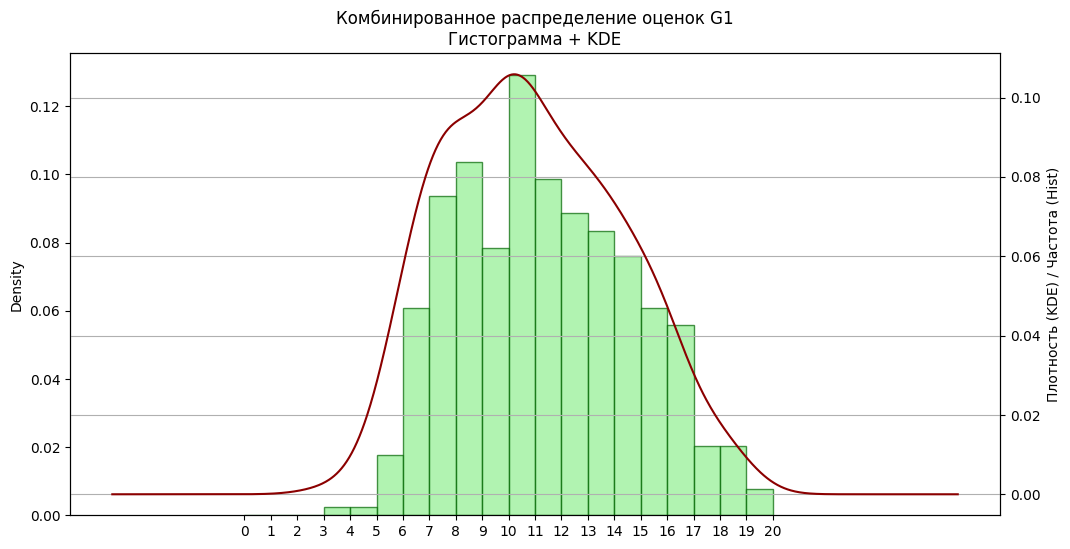

In [ ]:
# 1. Используя метод Series (прямое обращение к столбцу)
plt.figure(figsize=(10, 6))
data['G1'].plot(kind='hist',
                bins=20,
                color='skyblue',
                edgecolor='black',
                title='Распределение оценок G1 (метод Series)')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 2. Используя метод DataFrame (через df.plot.hist)
plt.figure(figsize=(10, 6))
data.plot.hist(y='G1',
              bins=20,
              color='salmon',
              edgecolor='black',
              title='Распределение оценок G1 (метод DataFrame)')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.grid(axis='y', alpha=0.5)
plt.show()

# 3. Альтернативный вариант с настройками
plt.figure(figsize=(12, 6))
ax = data['G1'].plot.hist(bins=range(0, 21, 1),  # Биннинг по всем возможным оценкам
                         color='lightgreen',
                         edgecolor='darkgreen',
                         density=True,  # Нормализованное распределение
                         alpha=0.7)

# Добавляем линию плотности
data['G1'].plot(kind='kde', color='darkred', ax=ax, secondary_y=True)

plt.title('Комбинированное распределение оценок G1\nГистограмма + KDE')
plt.xlabel('Оценка')
plt.ylabel('Плотность (KDE) / Частота (Hist)')
plt.grid(axis='y')
plt.xticks(range(0, 21, 1))  # Все возможные оценки от 0 до 20
plt.show()

<Figure size 1000x600 with 0 Axes>

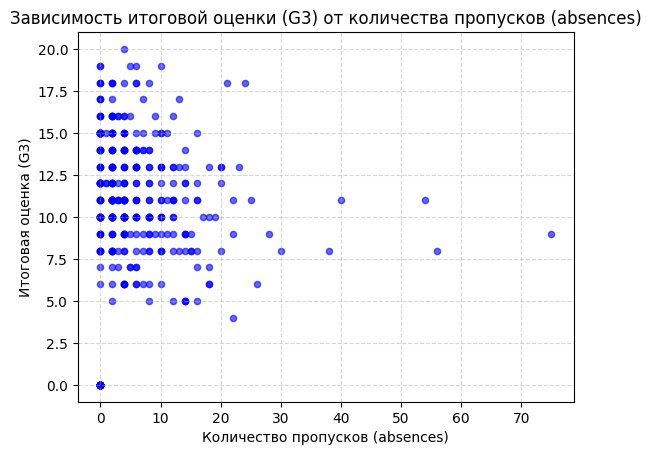

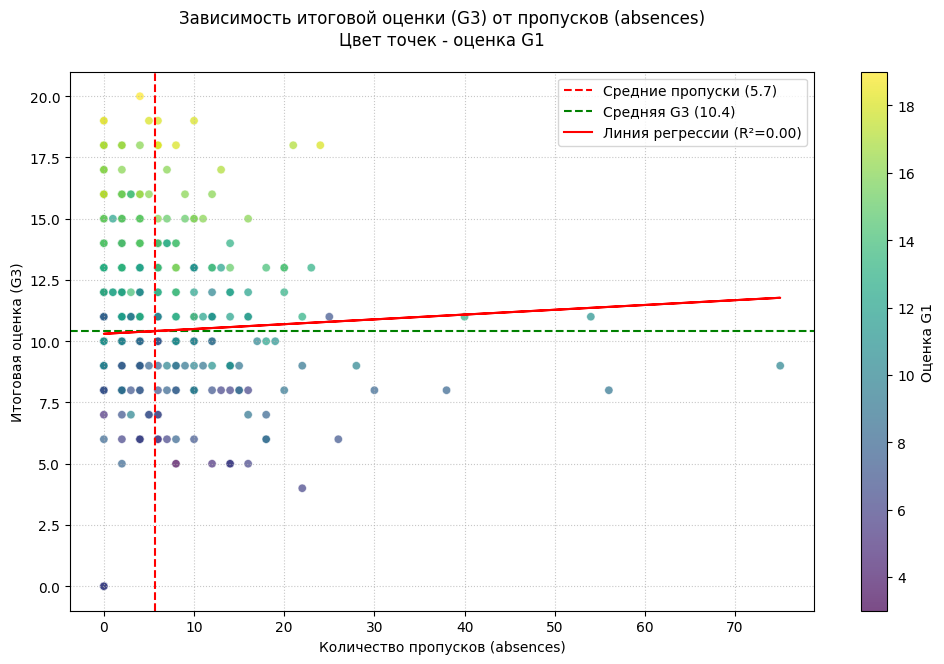

Коэффициент корреляции Пирсона: 0.034
p-value: 0.4973


In [ ]:
# 1. Базовый scatter plot через pandas
plt.figure(figsize=(10, 6))
data.plot.scatter(x='absences',
                 y='G3',
                 color='blue',
                 alpha=0.6,
                 title='Зависимость итоговой оценки (G3) от количества пропусков (absences)')
plt.xlabel('Количество пропусков (absences)')
plt.ylabel('Итоговая оценка (G3)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 2. Улучшенная версия с дополнительной информацией
plt.figure(figsize=(12, 7))

# Собственно scatter plot
scatter = plt.scatter(x=data['absences'],
                     y=data['G3'],
                     c=data['G1'],  # Цвет точек по оценке G1
                     cmap='viridis',
                     alpha=0.7,
                     edgecolors='w',
                     linewidth=0.5)

# Добавляем цветовую шкалу
cbar = plt.colorbar(scatter)
cbar.set_label('Оценка G1')

# Добавляем линии средних
mean_absences = data['absences'].mean()
mean_g3 = data['G3'].mean()
plt.axvline(mean_absences, color='red', linestyle='--', label=f'Средние пропуски ({mean_absences:.1f})')
plt.axhline(mean_g3, color='green', linestyle='--', label=f'Средняя G3 ({mean_g3:.1f})')

# Настройки графика
plt.title('Зависимость итоговой оценки (G3) от пропусков (absences)\nЦвет точек - оценка G1', pad=20)
plt.xlabel('Количество пропусков (absences)')
plt.ylabel('Итоговая оценка (G3)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)

# 3. Добавим регрессионную линию для наглядности
import numpy as np
from scipy import stats

# Рассчитываем линейную регрессию
slope, intercept, r_value, p_value, std_err = stats.linregress(data['absences'], data['G3'])
line = slope * data['absences'] + intercept

plt.plot(data['absences'], line, 'r-', label=f'Линия регрессии (R²={r_value**2:.2f})')
plt.legend()

plt.show()

# Выводим статистику корреляции
print(f"Коэффициент корреляции Пирсона: {r_value:.3f}")
print(f"p-value: {p_value:.4f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install pandas numpy matplotlib seaborn

In [ ]:
!pip install kaggle

In [ ]:
# Установка Kaggle API (если ещё не установлен)
!pip install -q kaggle

# Создание директории .kaggle и запись ваших учётных данных
import json
import os

# Ваши учётные данные
kaggle_creds = {
    "username": "bambipolina",
    "key": "545142e000734c494e7dbc49ac875179"
}

# Создаём директорию .kaggle, если её нет
os.makedirs('/root/.kaggle', exist_ok=True)

# Записываем учётные данные в файл
with open('/root/.kaggle/kaggle.json', 'w') as f:
    json.dump(kaggle_creds, f)

# Устанавливаем нужные права доступа
!chmod 600 /root/.kaggle/kaggle.json

# Теперь можно загрузить датасет
!kaggle datasets download hanaksoy/health-and-sleep-statistics --unzip

Dataset URL: https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics
License(s): CC0-1.0
  0% 0.00/1.17k [00:00<?, ?B/s]
100% 1.17k/1.17k [00:00<00:00, 3.12MB/s]


In [ ]:
data = pd.read_csv('Health_Sleep_Statistics.csv')

In [ ]:
# Обзор датасета
data.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [ ]:
data.shape

(100, 12)

In [ ]:
print(data.columns)
print(data.index)

Index(['User ID', 'Age', 'Gender', 'Sleep Quality', 'Bedtime', 'Wake-up Time',
       'Daily Steps', 'Calories Burned', 'Physical Activity Level',
       'Dietary Habits', 'Sleep Disorders', 'Medication Usage'],
      dtype='object')
RangeIndex(start=0, stop=100, step=1)


In [ ]:
# Приведем имена колонок к snake_case
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
print(data.columns)

Index(['user_id', 'age', 'gender', 'sleep_quality', 'bedtime', 'wake_up_time',
       'daily_steps', 'calories_burned', 'physical_activity_level',
       'dietary_habits', 'sleep_disorders', 'medication_usage'],
      dtype='object')


In [ ]:
data.describe()

,user_id,age,sleep_quality,daily_steps,calories_burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [ ]:
data.describe(include = 'object')

,gender,bedtime,wake_up_time,physical_activity_level,dietary_habits,sleep_disorders,medication_usage
count,100,100,100,100,100,100,100
unique,2,14,7,3,3,2,2
top,f,00:30,07:00,medium,unhealthy,no,no
freq,50,11,37,38,41,74,80


In [ ]:
data.isna().sum()

,0
user_id,0
age,0
gender,0
sleep_quality,0
bedtime,0
wake_up_time,0
daily_steps,0
calories_burned,0
physical_activity_level,0
dietary_habits,0


In [ ]:
# Группируем по полу и вычисляем среднее качество сна
mean_sleep_quality_gender = data.groupby('gender')['sleep_quality'].mean()

# Находим пол с максимальным средним качеством сна
max_mean_sleep_quality_gender = mean_sleep_quality_gender.idxmax()

# Вычисляем модуль разницы между средними значениями
diff_mean_sleep_quality = mean_sleep_quality_gender.max() - mean_sleep_quality_gender.min()

print("Среднее качество сна по полу:")
print(mean_sleep_quality_gender)
print(f"\nПол с лучшим качеством сна: {max_mean_sleep_quality_gender}")
print(f"Разница между максимальным и минимальным средним: {diff_mean_sleep_quality:.2f}")

Среднее качество сна по полу:
gender
f    8.42
m    5.58
Name: sleep_quality, dtype: float64

Пол с лучшим качеством сна: f
Разница между максимальным и минимальным средним: 2.84


In [ ]:
print(
    f"Результат анализа:\n"
    f"• {max_mean_sleep_quality_gender.upper()} спят лучше (средняя оценка сна выше)\n"
    f"• Разница в качестве сна составляет: {diff_mean_sleep_quality:.2f} балла"
)

Результат анализа:
• F спят лучше (средняя оценка сна выше)
• Разница в качестве сна составляет: 2.84 балла


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   user_id                  100 non-null    int64 
 1   age                      100 non-null    int64 
 2   gender                   100 non-null    object
 3   sleep_quality            100 non-null    int64 
 4   bedtime                  100 non-null    object
 5   wake_up_time             100 non-null    object
 6   daily_steps              100 non-null    int64 
 7   calories_burned          100 non-null    int64 
 8   physical_activity_level  100 non-null    object
 9   dietary_habits           100 non-null    object
 10  sleep_disorders          100 non-null    object
 11  medication_usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


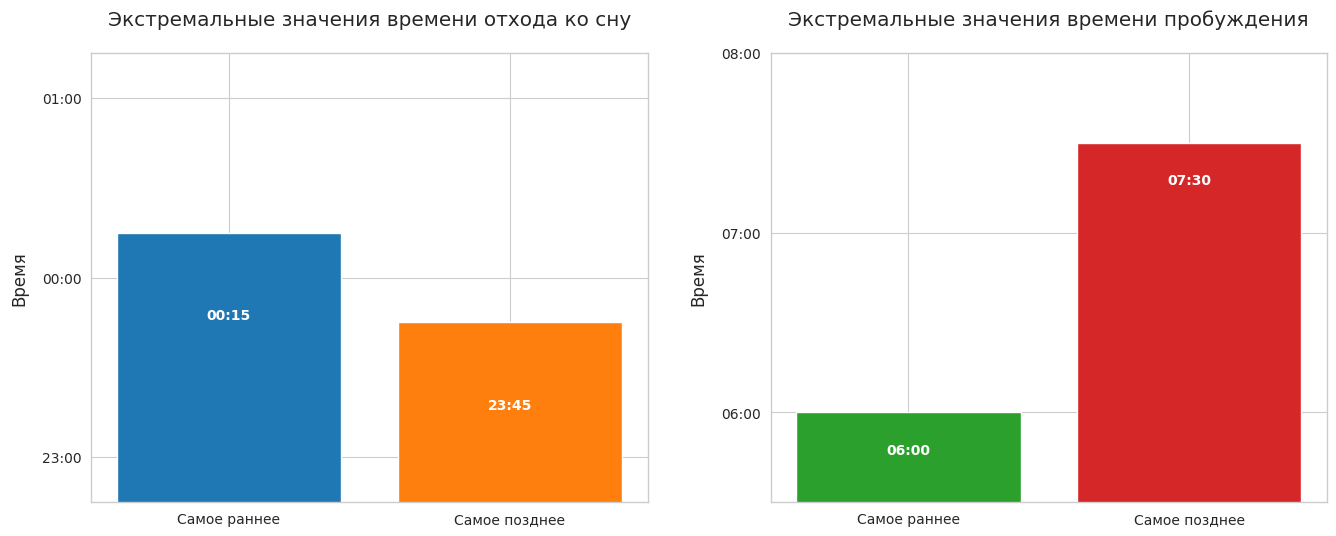

00:15 06:00
23:45 07:30


In [ ]:
from datetime import datetime
import seaborn as sns

sns.set_style("whitegrid")

def parse_time(time_str):
    try:
        return datetime.strptime(time_str, "%H:%M:%S").time()
    except ValueError:
        return datetime.strptime(time_str, "%H:%M").time()

data['bedtime_dt'] = data['bedtime'].apply(parse_time)
data['wakeup_dt'] = data['wake_up_time'].apply(parse_time)

min_bedtime = data['bedtime_dt'].min()
max_bedtime = data['bedtime_dt'].max()
min_wakeup = data['wakeup_dt'].min()
max_wakeup = data['wakeup_dt'].max()

def minutes_to_time(minutes):
    hours = minutes // 60
    mins = minutes % 60
    return f"{hours:02d}:{mins:02d}"

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
times = [min_bedtime, max_bedtime]
time_minutes = [t.hour*60 + t.minute for t in times]
time_labels = [t.strftime('%H:%M') for t in times]

adjusted_times = [t if t >= 1080 else t + 1440 for t in time_minutes]

bars = plt.bar(['Самое раннее', 'Самое позднее'],
               adjusted_times,
               color=['#1f77b4', '#ff7f0e'],
               edgecolor='white',
               linewidth=1)

plt.title('Экстремальные значения времени отхода ко сну', pad=20)
plt.ylabel('Время', labelpad=10)

yticks = np.arange(1200, 1560, 60)
ytick_labels = [minutes_to_time(y % 1440) for y in yticks]
plt.yticks(yticks, ytick_labels)
plt.ylim(min(adjusted_times)-60, max(adjusted_times)+60)

for bar, label in zip(bars, time_labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-30,
             label, ha='center', va='bottom', color='white', fontweight='bold')

plt.subplot(1, 2, 2)
times = [min_wakeup, max_wakeup]
time_minutes = [t.hour*60 + t.minute for t in times]
time_labels = [t.strftime('%H:%M') for t in times]

bars = plt.bar(['Самое раннее', 'Самое позднее'],
               time_minutes,
               color=['#2ca02c', '#d62728'],
               edgecolor='white',
               linewidth=1)

plt.title('Экстремальные значения времени пробуждения', pad=20)
plt.ylabel('Время', labelpad=10)

yticks = np.arange(300, 541, 60)
ytick_labels = [minutes_to_time(y) for y in yticks]
plt.yticks(yticks, ytick_labels)
plt.ylim(min(time_minutes)-30, max(time_minutes)+30)

for bar, label in zip(bars, time_labels):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height-15,
             label, ha='center', va='bottom', color='white', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.show()

min_bedtime_str = min_bedtime.strftime('%H:%M')
min_wake_up_time_str = min_wakeup.strftime('%H:%M')
max_bedtime_str = max_bedtime.strftime('%H:%M')
max_wake_up_time_str = max_wakeup.strftime('%H:%M')

print(' '.join([min_bedtime_str, min_wake_up_time_str]))
print(' '.join([max_bedtime_str, max_wake_up_time_str]))

In [ ]:
def parse_time(time_str):
    try:
        return datetime.strptime(time_str, "%H:%M:%S").time()
    except ValueError:
        return datetime.strptime(time_str, "%H:%M").time()

min_bedtime = min(data['bedtime'].apply(parse_time)).strftime('%H:%M')
min_wake_up_time = min(data['wake_up_time'].apply(parse_time)).strftime('%H:%M')

max_bedtime = max(data['bedtime'].apply(parse_time)).strftime('%H:%M')
max_wake_up_time = max(data['wake_up_time'].apply(parse_time)).strftime('%H:%M')

print(' '.join([min_bedtime, min_wake_up_time]))
print(' '.join([max_bedtime, max_wake_up_time]))

00:15 06:00
23:45 07:30


In [ ]:
pd.to_datetime(data.bedtime, format = "%H:%M").head(5)

,bedtime
0,1900-01-01 23:00:00
1,1900-01-01 00:30:00
2,1900-01-01 22:45:00
3,1900-01-01 01:00:00
4,1900-01-01 23:30:00


In [ ]:
data['bedtime_dt'] = pd.to_datetime(data.bedtime, format = "%H:%M")
data['wake_up_time_dt'] = pd.to_datetime(data.wake_up_time, format = "%H:%M")

data['bedtime_hour'] = data.bedtime_dt.dt.hour
data['wake_up_time_hour'] = data.wake_up_time_dt.dt.hour

min_bedtime_hour, min_wake_up_time_hour = data.bedtime_hour[data.bedtime_hour > 12].min(), data.wake_up_time_hour.min()
print(' '.join(map(str, [min_bedtime_hour, min_wake_up_time_hour])))

max_bedtime_hour, max_wake_up_time_hour = data.bedtime_hour[data.bedtime_hour < 12].max(), data.wake_up_time_hour.max()
print(' '.join(map(str, [max_bedtime_hour, max_wake_up_time_hour])))

22 6
1 7


In [ ]:
data['sleep_duration_hours'] = (24 - data.bedtime_hour + data.wake_up_time_hour) % 24
max_sleep_duration = data.sleep_duration_hours.max()

print(f'Максимальная продолжительность сна - {max_sleep_duration}')

Максимальная продолжительность сна - 9


In [ ]:
data[data.gender == 'f']['bedtime'].value_counts(normalize=True)

,proportion
bedtime,
23:15,0.20
23:00,0.18
22:30,0.18
22:15,0.16
23:30,0.10
22:45,0.08
22:00,0.06
01:00,0.02
23:45,0.02


In [ ]:
data[data.gender == 'm']['bedtime'].value_counts(normalize=True)

,proportion
bedtime,
00:30,0.22
01:30,0.22
00:45,0.20
01:15,0.16
01:00,0.10
00:15,0.08
22:00,0.02


In [ ]:
female_bedtime_before_midnight = data[data.gender == 'f'].bedtime_hour.apply(lambda x: 1 if 12 < x < 24 else 0).mean()
male_bedtime_before_midnight = data[data.gender == 'm'].bedtime_hour.apply(lambda x: 1 if 12 < x < 24 else 0).mean()

print("{:.2f}, {:.2f}".format(female_bedtime_before_midnight, male_bedtime_before_midnight))

0.98, 0.02


In [ ]:
data[data.bedtime_hour < 12].physical_activity_level.value_counts()

,count
physical_activity_level,
low,26
medium,24


In [ ]:
frequently_activity_level = data[data.bedtime_hour < 12].groupby('physical_activity_level')['user_id'].count().idxmax()

print(f'Наиболее популярный уровень физической активности у поздно ложащихся людей - {frequently_activity_level}')

Наиболее популярный уровень физической активности у поздно ложащихся людей - low


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

github_url = "https://raw.githubusercontent.com/dslialin/temporary/main/laptops.csv"

try:
    data_lap = pd.read_csv(github_url)
    print("Датесет успешно загружен!")

    print("\nПервые 5 строк:")
    print(data_lap.head())

    print("\nИнформация о структуре:")
    print(data_lap.info())

    print("\nОсновная статистика:")
    print(data_lap.describe(include='all'))

except Exception as e:
    print(f"Ошибка загрузки: {e}")
    print("Проверьте:")
    print("1. Доступность интернета")
    print("2. Корректность URL")
    print("3. Формат файла (должен быть CSV)")

Датесет успешно загружен!

Первые 5 строк:
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD

In [ ]:
data_lap.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
data_lap.shape

(1275, 15)

In [ ]:
print(data_lap.columns)
print(data_lap.index)

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')
RangeIndex(start=0, stop=1275, step=1)


In [ ]:
data_lap.columns = data_lap.columns.str.lower()
data_lap.columns = data_lap.columns.str.replace(" ", "_")
data_lap.columns = data_lap.columns.str.replace(r"[()]","", regex=True)
data_lap = data_lap.rename({"typename": "type_name", "screenresolution": "screen_resolution", "opsys": "op_sys"}, axis = 1)
print(data_lap.columns)

Index(['company', 'product', 'type_name', 'inches', 'screen_resolution',
       'cpu_company', 'cpu_type', 'cpu_frequency_ghz', 'ram_gb', 'memory',
       'gpu_company', 'gpu_type', 'op_sys', 'weight_kg', 'price_euro'],
      dtype='object')


In [ ]:
data_lap.shape[0] + data_lap.shape[1]

1290

In [ ]:
data_lap.describe()

,inches,cpu_frequency_ghz,ram_gb,weight_kg,price_euro
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [ ]:
data_lap.describe(include = 'object')

,company,product,type_name,screen_resolution,cpu_company,cpu_type,memory,gpu_company,gpu_type,op_sys
count,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
unique,19,618,6,40,3,93,39,4,106,9
top,Dell,XPS 13,Notebook,Full HD 1920x1080,Intel,Core i5 7200U,256GB SSD,Intel,HD Graphics 620,Windows 10
freq,291,30,707,505,1214,193,412,704,280,1048


In [ ]:
data_lap.isna().sum()

,0
company,0
product,0
type_name,0
inches,0
screen_resolution,0
cpu_company,0
cpu_type,0
cpu_frequency_ghz,0
ram_gb,0
memory,0


In [ ]:
template = '''{0}
"--------"'''

for col in list(data_lap.columns):
    nan_summary = data_lap[col].isna().value_counts()
    print(template.format(nan_summary))

company
False    1275
Name: count, dtype: int64
"--------"
product
False    1275
Name: count, dtype: int64
"--------"
type_name
False    1275
Name: count, dtype: int64
"--------"
inches
False    1275
Name: count, dtype: int64
"--------"
screen_resolution
False    1275
Name: count, dtype: int64
"--------"
cpu_company
False    1275
Name: count, dtype: int64
"--------"
cpu_type
False    1275
Name: count, dtype: int64
"--------"
cpu_frequency_ghz
False    1275
Name: count, dtype: int64
"--------"
ram_gb
False    1275
Name: count, dtype: int64
"--------"
memory
False    1275
Name: count, dtype: int64
"--------"
gpu_company
False    1275
Name: count, dtype: int64
"--------"
gpu_type
False    1275
Name: count, dtype: int64
"--------"
op_sys
False    1275
Name: count, dtype: int64
"--------"
weight_kg
False    1275
Name: count, dtype: int64
"--------"
price_euro
False    1275
Name: count, dtype: int64
"--------"


In [ ]:
print(data_lap.cpu_company.unique())
print(data_lap.gpu_company.unique())

['Intel' 'AMD' 'Samsung']
['Intel' 'AMD' 'Nvidia' 'ARM']


In [ ]:
amd_based = data_lap[data_lap[['cpu_company', 'gpu_company']].isin(['AMD']).any(axis=1)]
amd_based.head()

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD,A9-Series 9420,3.0,4,500GB HDD,AMD,Radeon R5,Windows 10,2.10,400.00
12,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.8,16,256GB SSD,AMD,Radeon Pro 555,macOS,1.83,2439.97
13,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel,Core i3 6006U,2.0,4,256GB SSD,AMD,Radeon R5 M430,Windows 10,2.20,498.90
16,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel,Core i7 7500U,2.7,8,256GB SSD,AMD,Radeon R5 M430,Windows 10,2.20,745.00


In [ ]:
len(amd_based)

174

In [ ]:
data_lap.memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [ ]:
light_and_hdd = data_lap[(data_lap.weight_kg < 2) & (data_lap.memory.str.lower().str.contains('hdd'))]
light_and_hdd.memory.value_counts()

,count
memory,
500GB HDD,43
1TB HDD,27
256GB SSD + 1TB HDD,5
128GB SSD + 1TB HDD,5
256GB SSD + 2TB HDD,2
2TB HDD,1
32GB HDD,1
256GB SSD + 500GB HDD,1


In [ ]:
light_and_hdd.head()

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro
10,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,4,500GB HDD,Intel,HD Graphics 620,No OS,1.86,393.90
11,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i3 6006U,2.0,4,500GB HDD,Intel,HD Graphics 520,No OS,1.86,344.99
22,HP,255 G6,Notebook,15.6,1366x768,AMD,E-Series E2-9000e,1.5,4,500GB HDD,AMD,Radeon R2,No OS,1.86,258.00
38,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,4,1TB HDD,Intel,HD Graphics 620,Windows 10,1.86,488.69
66,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i3 6006U,2.0,4,500GB HDD,AMD,Radeon 520,Windows 10,1.86,438.69


In [ ]:
len(light_and_hdd)

85

In [ ]:
print(data_lap.company.unique())
print(data_lap.ram_gb.unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
[ 8 16  4  2 12  6 32 24 64]


In [ ]:
apple_lenovo_powered = data_lap[data_lap.company.isin(['Apple', 'Lenovo']) & (data_lap.ram_gb == 16)]
apple_lenovo_powered.company.value_counts()

,count
company,
Lenovo,37
Apple,4


In [ ]:
data_lap.nsmallest(n=1, columns=['price_euro'], keep='all')

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,1366x768,Intel,Celeron Dual Core 3205U,1.5,2,32GB SSD,Intel,HD Graphics,Chrome OS,1.3,174.0


In [ ]:
data_lap.nlargest(n=1, columns=['price_euro'], keep='all')

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel,Core i7 7820HK,2.9,32,1TB SSD,Nvidia,GeForce GTX 1080,Windows 10,3.49,6099.0


In [ ]:
data_lap.memory.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1275 entries, 0 to 1274
Series name: memory
Non-Null Count  Dtype 
--------------  ----- 
1275 non-null   object
dtypes: object(1)
memory usage: 10.1+ KB


In [ ]:
data_lap.memory.value_counts().head(10)

,count
memory,
256GB SSD,412
1TB HDD,215
500GB HDD,124
512GB SSD,114
128GB SSD + 1TB HDD,94
128GB SSD,74
256GB SSD + 1TB HDD,73
32GB Flash Storage,36
2TB HDD,16


In [ ]:
from re import findall

s = '512GB SSD + 1.0TB Hybrid'
pattern = "[\d+|\d+\.\d+]+[tb|gb]{2}"
s_list = findall(pattern, s.lower())
print(s_list)

['512gb', '1.0tb']


In [ ]:
s_list = ['512gb', '1.0tb']

s_list_prep = [(float(rec[:-2]), rec[-2:]) for rec in s_list]
print(s_list_prep)

conv = {'gb': 1, 'tb': 1000}
print(sum(el[0] * conv[el[1]] for el in s_list_prep))

[(512.0, 'gb'), (1.0, 'tb')]
1512.0


In [ ]:
def parse_memory_info(string):

    from re import findall

    pattern = "[\d+|\d+\.\d+]+[tb|gb]{2}"
    conv = {'gb': 1, 'tb': 1000}

    s_list = findall(pattern, string.lower())
    s_list_prep = [(float(rec[:-2]), rec[-2:]) for rec in s_list]

    mem_gb = sum(el[0] * conv[el[1]] for el in s_list_prep)
    return int(mem_gb)


In [ ]:
s = '128.0GB SSD + 2.172TB HDD'
print(parse_memory_info(s))

2300


In [ ]:
data_lap['memory_gb'] = data_lap['memory'].apply(parse_memory_info)
data_lap[['memory_gb', 'memory']].sample(10)

,memory_gb,memory
3,512,512GB SSD
222,256,256GB SSD
770,256,256GB SSD
1118,512,512GB SSD
1052,256,256GB SSD
109,256,256GB SSD
308,1128,128GB SSD + 1TB HDD
362,1128,128GB SSD + 1TB HDD
283,256,256GB SSD
104,256,256GB SSD


In [ ]:
data_lap.op_sys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
data_lap['gaming_laptop'] = data_lap.apply(lambda row: 1 if row.ram_gb >= 8 and row.memory_gb >= 512 and row.op_sys != 'macOS' else 0, axis=1)

In [ ]:
data_lap.sample(10)

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro,memory_gb,gaming_laptop
175,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel,Core i3 7100U,2.4,8,1TB HDD,Intel,HD Graphics 620,Windows 10,2.30,459.00,1000,1
1150,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel,Core i3 6006U,2.0,4,1TB HDD,Intel,HD Graphics 520,No OS,1.90,339.00,1000,0
462,Asus,Pro P2540UA-AB51,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,1TB HDD,Intel,HD Graphics 620,Windows 10,2.37,749.00,1000,1
1141,MSI,GP62M 7RDX,Gaming,15.6,Full HD 1920x1080,Intel,Core i7 7700HQ,2.8,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 1050,Windows 10,2.40,1142.80,1128,1
1139,HP,EliteBook 850,Ultrabook,15.6,Full HD 1920x1080,Intel,Core i7 6500U,2.5,8,256GB SSD,Intel,HD Graphics 520,Windows 7,1.88,2171.72,256,0
756,HP,15-cb003na (i5-7300HQ/8GB/1TB,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i5 7300HQ,2.5,8,128GB SSD + 1TB HDD,Nvidia,GeForce GTX 1050,Windows 10,2.20,1099.00,1128,1
773,Dell,Inspiron 7567,Gaming,15.6,Full HD 1920x1080,Intel,Core i7 7700HQ,2.8,8,1TB HDD,Nvidia,GeForce GTX 1050,Windows 10,2.62,1099.00,1000,1
1184,HP,Pavilion 15-BC000nv,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel,Core i7 6700HQ,2.6,6,1TB HDD,Nvidia,GeForce GTX 960M,Windows 10,2.18,799.00,1000,0
846,HP,Chromebook X360,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel,Celeron Dual Core N3350,1.1,4,32GB Flash Storage,Intel,HD Graphics 500,Chrome OS,1.40,615.00,32,0
129,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel,Core i5 8250U,1.6,8,256GB SSD,Intel,UHD Graphics 620,Windows 10,2.50,928.00,256,0


In [ ]:
data_lap.op_sys.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
op_sys_to_dummy = data_lap.op_sys.str.lower().str.replace(" ", "_")
op_sys_dummies = pd.get_dummies(op_sys_to_dummy, prefix='is')

In [ ]:
op_sys_dummies.head()

,is_android,is_chrome_os,is_linux,is_mac_os_x,is_macos,is_no_os,is_windows_10,is_windows_10_s,is_windows_7
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False


In [ ]:
op_sys_for_products = data_lap[['company', 'product']].copy().join(op_sys_dummies)

In [ ]:
print(list(op_sys_for_products.columns))

['company', 'product', 'is_android', 'is_chrome_os', 'is_linux', 'is_mac_os_x', 'is_macos', 'is_no_os', 'is_windows_10', 'is_windows_10_s', 'is_windows_7']


In [ ]:
from random import sample

test_columns = \
['is_android',
 'is_chrome_os',
 'is_linux',
 'is_mac_os_x',
 'is_macos',
 'is_no_os',
 'is_windows_10',
 'is_windows_10_s',
 'is_windows_7']

for os in sample(list(data_lap.op_sys.unique()), 3):
    print("\n------------------------------------------------------------------------------\n")
    print("OS:", os)
    print("")

    ind = data_lap[data_lap.op_sys == os].sample(1).index
    df_sel = op_sys_for_products[test_columns].loc[ind]

    print(df_sel)


------------------------------------------------------------------------------

OS: macOS

    is_android  is_chrome_os  is_linux  is_mac_os_x  is_macos  is_no_os  \
15       False         False     False        False      True     False   

    is_windows_10  is_windows_10_s  is_windows_7  
15          False            False         False  

------------------------------------------------------------------------------

OS: Windows 10

     is_android  is_chrome_os  is_linux  is_mac_os_x  is_macos  is_no_os  \
153       False         False     False        False     False     False   

     is_windows_10  is_windows_10_s  is_windows_7  
153           True            False         False  

------------------------------------------------------------------------------

OS: Mac OS X

      is_android  is_chrome_os  is_linux  is_mac_os_x  is_macos  is_no_os  \
1193       False         False     False         True     False     False   

      is_windows_10  is_windows_10_s  is_windows_7 

In [ ]:
import seaborn as sns

data_lap_vis = data_lap[['company', 'type_name', 'product', 'price_euro']].copy()
data_lap_vis['price_log'] = np.log(data_lap_vis.price_euro)

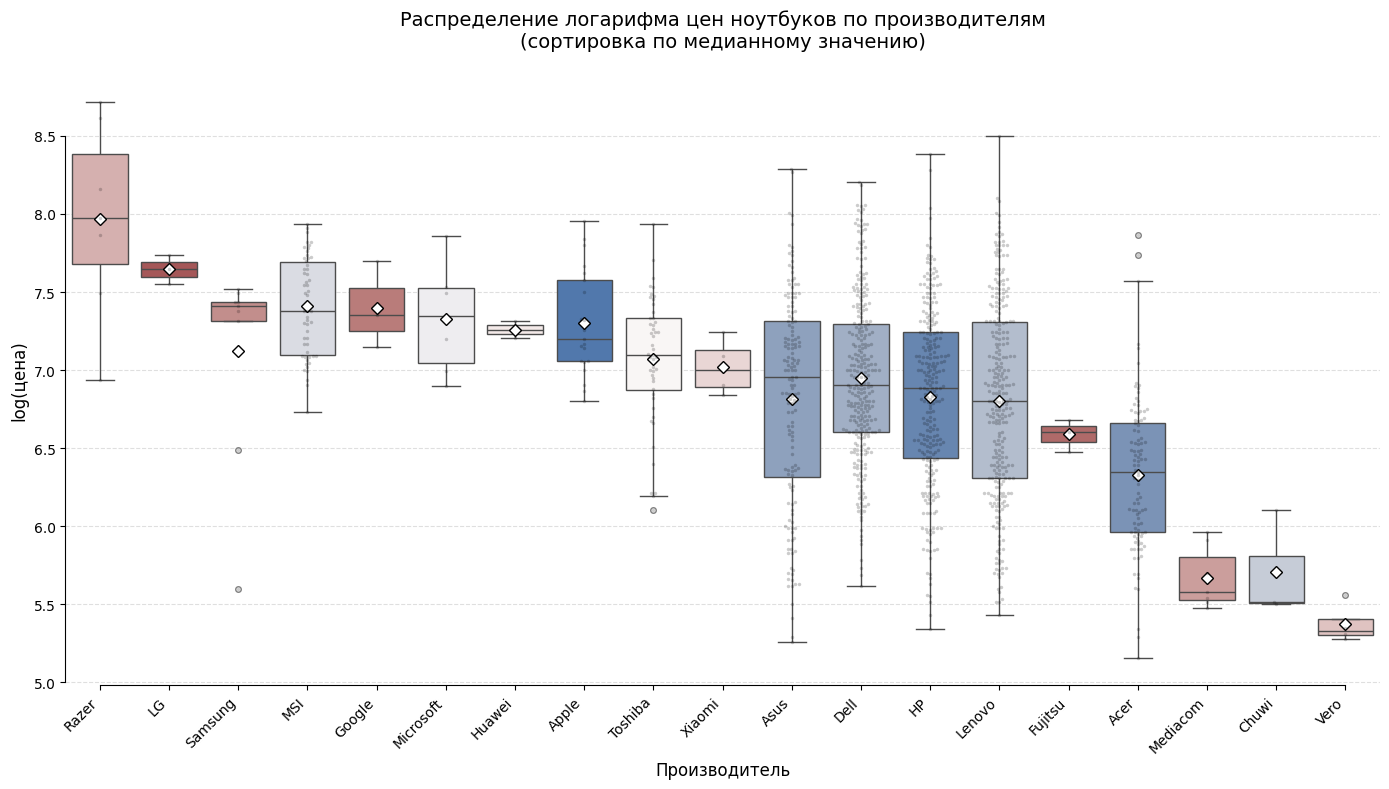

In [ ]:
price_order = data_lap_vis.groupby('company')['price_log'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x='company',
    y='price_log',
    data=data_lap_vis,
    hue='company',
    palette='vlag',
    order=price_order,
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black'},
    flierprops={'marker':'o', 'markersize':4, 'markerfacecolor':'none', 'markeredgecolor':'gray'},
    dodge=False,
    legend=False
)

sns.swarmplot(
    x='company',
    y='price_log',
    data=data_lap_vis,
    order=price_order,
    color='black',
    alpha=0.2,
    size=2.5,
    ax=ax
)

plt.title('Распределение логарифма цен ноутбуков по производителям\n(сортировка по медианному значению)',
          fontsize=14, pad=20)
plt.xlabel('Производитель', fontsize=12)
plt.ylabel('log(цена)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)
sns.despine(trim=True)

plt.tight_layout()
plt.show()

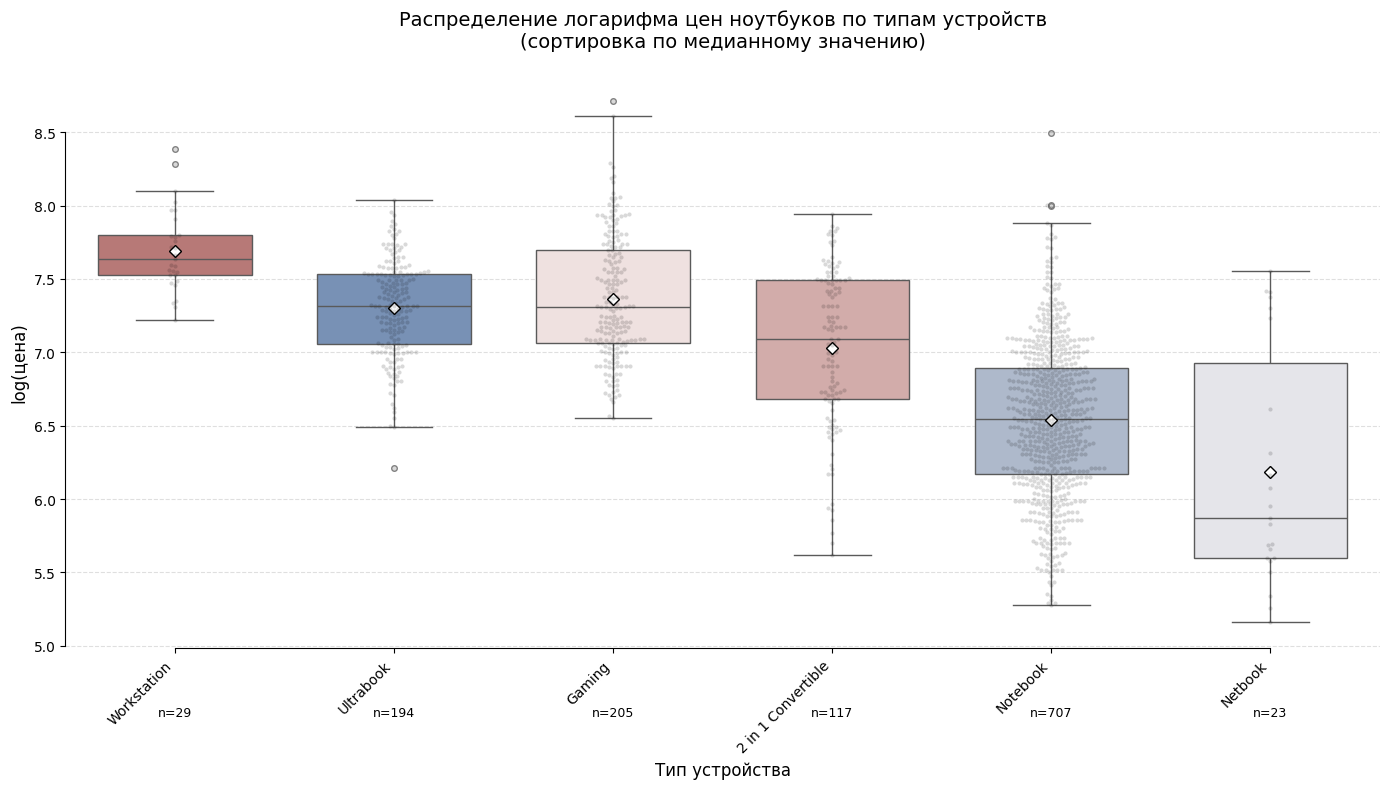

In [ ]:
price_order_2 = data_lap_vis.groupby('type_name')['price_log'].median().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
ax = sns.boxplot(
    x='type_name',
    y='price_log',
    data=data_lap_vis,
    hue='type_name',
    palette='vlag',
    order=price_order_2,
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black'},
    flierprops={'marker':'o', 'markersize':4, 'markerfacecolor':'none', 'markeredgecolor':'gray'},
    width=0.7,
    legend=False
)

sns.swarmplot(
    x='type_name',
    y='price_log',
    data=data_lap_vis,
    order=price_order_2,
    color='black',
    alpha=0.15,
    size=3,
    ax=ax
)

plt.title('Распределение логарифма цен ноутбуков по типам устройств\n(сортировка по медианному значению)',
          fontsize=14, pad=20)
plt.xlabel('Тип устройства', fontsize=12)
plt.ylabel('log(цена)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

sns.despine(trim=True)
plt.tight_layout()

for i, type_name in enumerate(price_order_2):
    count = data_lap_vis[data_lap_vis['type_name'] == type_name].shape[0]
    ax.text(i, ax.get_ylim()[0] - 0.1*(ax.get_ylim()[1]-ax.get_ylim()[0]),
            f'n={count}',
            ha='center',
            va='top',
            fontsize=9)

plt.show()

In [ ]:
vis_grouped = data_lap_vis.copy()
vis_grouped["price_ln_comp_med"] = vis_grouped.groupby("company")["price_log"].transform('median')

vis_grouped = vis_grouped.groupby(['type_name', 'company']).agg(
    price_ln_comp_med = ('price_ln_comp_med', 'max'),
    price_ln_group_med = ('price_log', 'median'),
    cnt = ('product', 'count'),
).reset_index()

vis_grouped = vis_grouped.sort_values(by=['price_ln_comp_med','price_ln_group_med'], ascending=[False, False])
print(vis_grouped)

             type_name    company  price_ln_comp_med  price_ln_group_med  cnt
13              Gaming      Razer           7.972121            8.160232    5
42           Ultrabook      Razer           7.972121            7.215664    2
39           Ultrabook         LG           7.649216            7.649216    3
28            Notebook    Samsung           7.407924            7.437795    1
43           Ultrabook    Samsung           7.407924            7.407924    5
6   2 in 1 Convertible    Samsung           7.407924            6.992855    2
19             Netbook    Samsung           7.407924            5.594711    1
12              Gaming        MSI           7.377134            7.377134   54
36           Ultrabook     Google           7.351800            7.351800    3
41           Ultrabook  Microsoft           7.347706            7.347706    6
38           Ultrabook     Huawei           7.259836            7.259836    2
33           Ultrabook      Apple           7.200194            

In [ ]:
vis_grouped.company.unique()

array(['Razer', 'LG', 'Samsung', 'MSI', 'Google', 'Microsoft', 'Huawei',
       'Apple', 'Toshiba', 'Xiaomi', 'Asus', 'Dell', 'HP', 'Lenovo',
       'Fujitsu', 'Acer', 'Mediacom', 'Chuwi', 'Vero'], dtype=object)

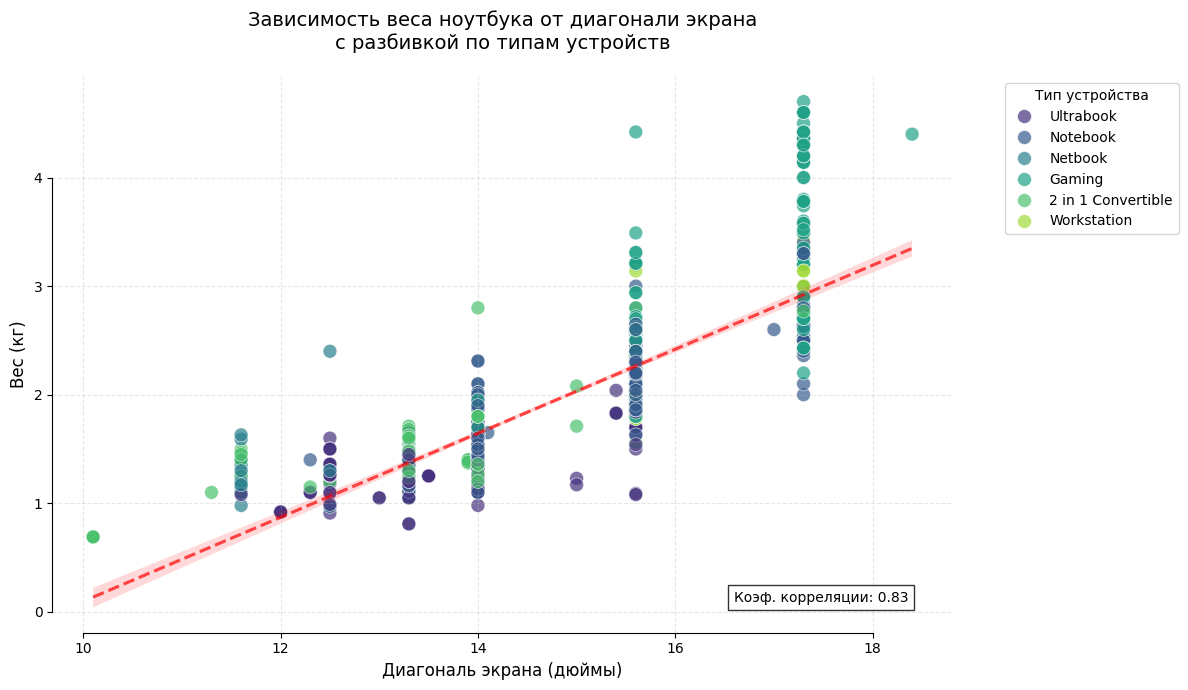

In [ ]:
plt.figure(figsize=(12, 7))

scatter = sns.scatterplot(
    x='inches',
    y='weight_kg',
    data=data_lap,
    hue='type_name',
    palette='viridis',
    alpha=0.7,
    s=100,
    edgecolor='w',
    linewidth=0.5
)

sns.regplot(
    x='inches',
    y='weight_kg',
    data=data_lap,
    scatter=False,
    color='red',
    ci=95,
    line_kws={'linestyle':'--', 'alpha':0.7, 'label':'Линия тренда'}
)

plt.title('Зависимость веса ноутбука от диагонали экрана\nс разбивкой по типам устройств',
          fontsize=14, pad=20)
plt.xlabel('Диагональ экрана (дюймы)', fontsize=12)
plt.ylabel('Вес (кг)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.3)
sns.despine(trim=True)

plt.legend(title='Тип устройства', bbox_to_anchor=(1.05, 1), loc='upper left')

corr = data_lap[['inches', 'weight_kg']].corr().iloc[0,1]
plt.text(0.95, 0.05, f'Коэф. корреляции: {corr:.2f}',
         ha='right', va='bottom',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

In [ ]:
data_lap.type_name.unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

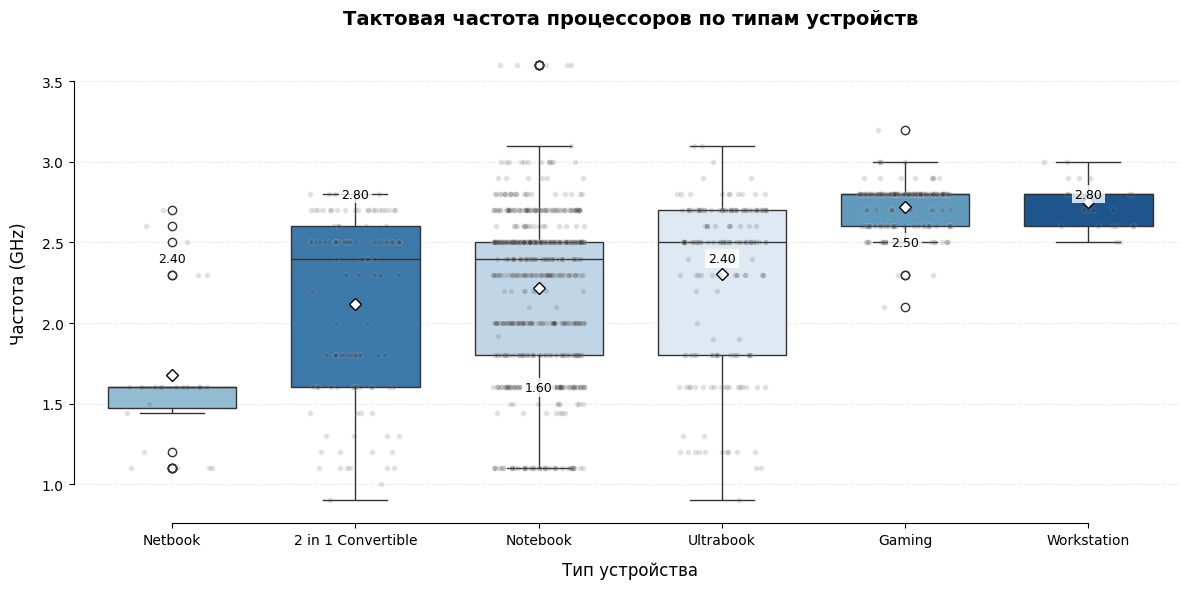

In [ ]:
plt.figure(figsize=(12, 6))

order = data_lap.groupby('type_name')['cpu_frequency_ghz'].median().sort_values().index

ax = sns.boxplot(
    x='type_name',
    y='cpu_frequency_ghz',
    data=data_lap,
    order=order,
    hue='type_name',
    palette="Blues",
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':6},
    width=0.7,
    dodge=False,
    legend=False
)

sns.stripplot(
    x='type_name',
    y='cpu_frequency_ghz',
    data=data_lap,
    order=order,
    color='#333333',
    alpha=0.15,
    size=4,
    jitter=0.25,
    ax=ax,
    linewidth=0.5,
    edgecolor='white'
)

medians = data_lap.groupby('type_name')['cpu_frequency_ghz'].median()
for i, (type_name, median) in enumerate(medians.items()):
    ax.text(i, median, f'{median:.2f}',
            ha='center', va='center',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

plt.title('Тактовая частота процессоров по типам устройств',
          fontsize=14, pad=18, fontweight='semibold')
plt.xlabel('Тип устройства', fontsize=12, labelpad=10)
plt.ylabel('Частота (GHz)', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=11)

ax.yaxis.grid(True, linestyle=':', alpha=0.4)
ax.set_axisbelow(True)

min_freq = data_lap['cpu_frequency_ghz'].min() - 0.1
max_freq = data_lap['cpu_frequency_ghz'].max() + 0.1
ax.set_ylim(min_freq, max_freq)

sns.despine(trim=True, offset=5)

plt.tight_layout()
plt.show()

In [ ]:
mask = ( (data_lap.cpu_frequency_ghz == data_lap.groupby(["type_name"])["cpu_frequency_ghz"].transform('min')) \
         | (data_lap.cpu_frequency_ghz == data_lap.groupby(["type_name"])["cpu_frequency_ghz"].transform('max'))
        )
lp_freq_dsc = data_lap[mask]

In [ ]:
lp_freq_dsc.sample(5)

,company,product,type_name,inches,screen_resolution,cpu_company,cpu_type,cpu_frequency_ghz,ram_gb,memory,gpu_company,gpu_type,op_sys,weight_kg,price_euro,memory_gb,gaming_laptop
568,Lenovo,IdeaPad 320-15IAP,Notebook,15.6,Full HD 1920x1080,Intel,Pentium Quad Core N4200,1.1,4,500GB HDD,Intel,HD Graphics 505,Windows 10,2.20,344.0,500,0
500,Asus,VivoBook E201NA,Netbook,11.6,1366x768,Intel,Celeron Dual Core N3350,1.1,4,64GB Flash Storage,Intel,HD Graphics 500,Windows 10 S,1.20,340.0,64,0
602,Acer,Aspire 1,Notebook,14.0,Full HD 1920x1080,Intel,Celeron Quad Core N3450,1.1,4,32GB Flash Storage,Intel,HD Graphics 500,Windows 10,1.60,329.0,32,0
515,Asus,VivoBook E12,Netbook,11.6,1366x768,Intel,Celeron Dual Core N3350,1.1,2,32GB Flash Storage,Intel,HD Graphics 500,Windows 10,1.10,245.0,32,0
906,HP,Elitebook 820,Netbook,12.5,Full HD 1920x1080,Intel,Core i7 7500U,2.7,8,512GB SSD,Intel,HD Graphics 620,Windows 10,1.26,1483.0,512,1


In [ ]:
lp_freq_dsc.shape

(66, 17)

In [ ]:
test_cases = lp_freq_dsc[['type_name', 'product', 'cpu_frequency_ghz']].sample(10).values.tolist()

for i, case_ in enumerate(test_cases):
    print( f'''------------------------------------------------------------------------------------
    Пример {i+1}. Laptop type - {case_[0]}. Product - {case_[1]}.
    > Частота в выводе: {case_[2]}. Мин.: {data_lap[data_lap.type_name == case_[0]]['cpu_frequency_ghz'].min()}. Макс.: {data_lap[data_lap.type_name == case_[0]]['cpu_frequency_ghz'].max()}'''
    )

------------------------------------------------------------------------------------
    Пример 1. Laptop type - Notebook. Product - IdeaPad 320-15IAP.
    > Частота в выводе: 1.1. Мин.: 1.1. Макс.: 3.6
------------------------------------------------------------------------------------
    Пример 2. Laptop type - Notebook. Product - VivoBook E403NA.
    > Частота в выводе: 1.1. Мин.: 1.1. Макс.: 3.6
------------------------------------------------------------------------------------
    Пример 3. Laptop type - Notebook. Product - Vivobook Max.
    > Частота в выводе: 1.1. Мин.: 1.1. Макс.: 3.6
------------------------------------------------------------------------------------
    Пример 4. Laptop type - Notebook. Product - VivoBook L402NA.
    > Частота в выводе: 1.1. Мин.: 1.1. Макс.: 3.6
------------------------------------------------------------------------------------
    Пример 5. Laptop type - 2 in 1 Convertible. Product - EliteBook x360.
    > Частота в выводе: 2.8. Мин.: 0.9

In [ ]:
print_lap_types = list(data_lap.groupby(["type_name"])["price_euro"].mean('mean').sort_values(ascending=False).items())

for (i, lap_type) in enumerate(print_lap_types):

  freq_min = lp_freq_dsc[ lp_freq_dsc.type_name == lap_type[0] ]['cpu_frequency_ghz'].min()
  freq_max = lp_freq_dsc[ lp_freq_dsc.type_name == lap_type[0] ]['cpu_frequency_ghz'].max()

  print(f'''---------------------------------------------------------------------------------------------------------------------------------------------------------------------
  Laptop type - {lap_type[0]}. средняя цена - {lap_type[1]:.2f}.

  > Примеры ноутбуков с наибольшей частотой ({freq_max} ГГц):
  >> {list( lp_freq_dsc[(lp_freq_dsc.type_name == lap_type[0]) & (lp_freq_dsc.cpu_frequency_ghz == freq_max)][['company', 'product']].agg(' '.join, axis=1).unique()[:4] )}

  > Примеры ноутбуков с наименьшей частотой ({freq_min} ГГц):
  >> {list( lp_freq_dsc[(lp_freq_dsc.type_name == lap_type[0]) & (lp_freq_dsc.cpu_frequency_ghz == freq_min)][['company', 'product']].agg(' '.join, axis=1).unique()[:4] )}
'''
  )

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
  Laptop type - Workstation. средняя цена - 2280.36.

  > Примеры ноутбуков с наибольшей частотой (3.0 ГГц):
  >> ['Dell Precision 7520', 'Dell Precision 3520']

  > Примеры ноутбуков с наименьшей частотой (2.5 ГГц):
  >> ['Lenovo ThinkPad P51s', 'HP ZBook 15u']

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
  Laptop type - Gaming. средняя цена - 1731.38.

  > Примеры ноутбуков с наибольшей частотой (3.2 ГГц):
  >> ['Asus Rog Strix']

  > Примеры ноутбуков с наименьшей частотой (2.1 ГГц):
  >> ['Lenovo IdeaPad Y700-15ACZ']

---------------------------------------------------------------------------------------------------------------------------------------------------------------------
  Laptop type - Ul

In [ ]:
table_pivot = pd.pivot_table(data_lap,
               values=['price_euro'],
               columns=['company'],
               aggfunc=['mean']
             )

In [ ]:
table_pivot.columns = ['_'.join(names) for names in table_pivot.columns]

In [ ]:
table_pivot.columns = table_pivot.columns.str.replace("mean_","")
table_pivot = table_pivot.T

In [ ]:
table_pivot.columns

Index(['price_euro'], dtype='object')

In [ ]:
table_pivot = table_pivot.rename({"price_euro": "price_euro_mean"}, axis=1)

In [ ]:
table_pivot.sort_values(by='price_euro_mean', ascending=False)

,price_euro_mean
Razer,3346.142857
LG,2099.000000
MSI,1728.908148
Google,1677.666667
Microsoft,1612.308333
Apple,1564.198571
Huawei,1424.000000
Samsung,1413.444444
Toshiba,1267.812500
Dell,1199.225120
